In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
data=pd.read_csv('./50_Startups.csv')
state_dummies=pd.get_dummies(data,'State')
state_dummies

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0
5,131876.90,99814.71,362861.36,156991.12,0,0,1
6,134615.46,147198.87,127716.82,156122.51,1,0,0
7,130298.13,145530.06,323876.68,155752.60,0,1,0
8,120542.52,148718.95,311613.29,152211.77,0,0,1
9,123334.88,108679.17,304981.62,149759.96,1,0,0


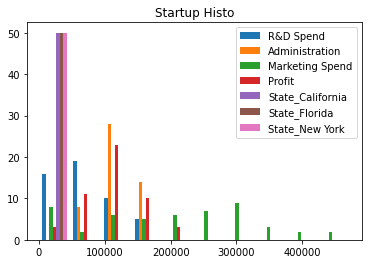

In [5]:
plt.hist(state_dummies)
plt.title('Startup Histo')
plt.legend(state_dummies.keys())
plt.show()

In [6]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
std_data=sc.fit_transform(state_dummies)
std_data[0]

array([ 2.01641149,  0.56075291,  2.15394309,  2.01120333, -0.71774056,
       -0.68599434,  1.39326109])

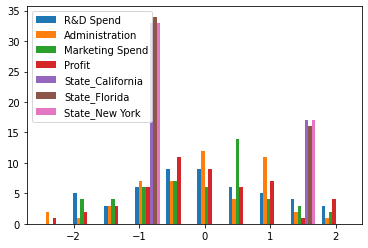

In [7]:
plt.hist(std_data)
plt.legend(state_dummies.keys())
plt.show()

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(std_data[:,0:6],std_data[:,6],test_size=0.33,random_state=42)

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [10]:
theta=np.ones(np.size(y_train))
#print(theta)
l_reg=LinearRegression()
lo_reg=DecisionTreeRegressor()

model=l_reg.fit(x_train,y_train)
model2=lo_reg.fit(x_train,y_train)
#model.coef_
print(model2.score(x_test,y_test))
print(y_test)
print(model.predict(x_test))
print(model2.predict(x_test))

1.0
[-0.71774056 -0.71774056 -0.71774056  1.39326109  1.39326109  1.39326109
 -0.71774056 -0.71774056 -0.71774056  1.39326109 -0.71774056 -0.71774056
 -0.71774056  1.39326109  1.39326109 -0.71774056 -0.71774056]
[-0.71774056 -0.71774056 -0.71774056  1.39326109  1.39326109  1.39326109
 -0.71774056 -0.71774056 -0.71774056  1.39326109 -0.71774056 -0.71774056
 -0.71774056  1.39326109  1.39326109 -0.71774056 -0.71774056]
[-0.71774056 -0.71774056 -0.71774056  1.39326109  1.39326109  1.39326109
 -0.71774056 -0.71774056 -0.71774056  1.39326109 -0.71774056 -0.71774056
 -0.71774056  1.39326109  1.39326109 -0.71774056 -0.71774056]
